In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
netflix_df=pd.read_csv('C:/Users/Durga P T M/AA_MachineLearning_Interview/EDA/Dataset/NetflixMovie/netflix_data.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [44]:
years=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
durations=[103,101,99,100,100,95,95,96,93,90]

movies_dict={'years':years,'durations':durations}
movies_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

In [45]:
dur_df=pd.DataFrame(movies_dict)
dur_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


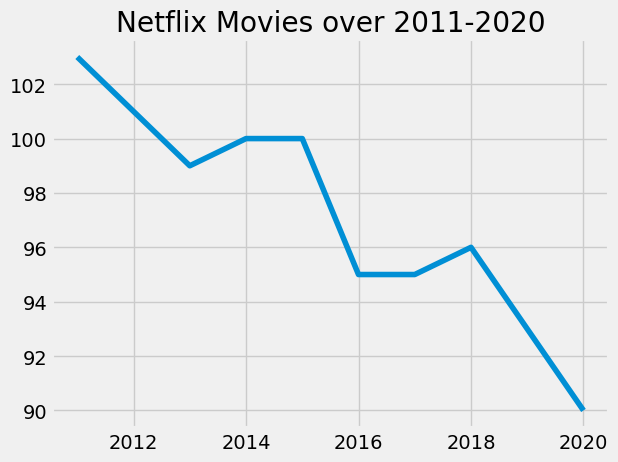

In [46]:
fig=plt.figure()

plt.plot(years,durations)

plt.title("Netflix Movies over 2011-2020")

plt.show()

In [47]:
netflix_movies_df=netflix_df[netflix_df['type']=='Movie']

netflix_movies=netflix_movies_df[['title','genre','country','release_year','duration']]

netflix_movies.head()

,title,genre,country,release_year,duration
1,7:19,Dramas,Mexico,2016,93
2,23:59,Horror Movies,Singapore,2011,78
3,9,Action,United States,2009,80
4,21,Dramas,United States,2008,123
6,122,Horror Movies,Egypt,2019,95


In [48]:
netflix_movies.isnull().sum()

title             0
genre             0
country         230
release_year      0
duration          0
dtype: int64

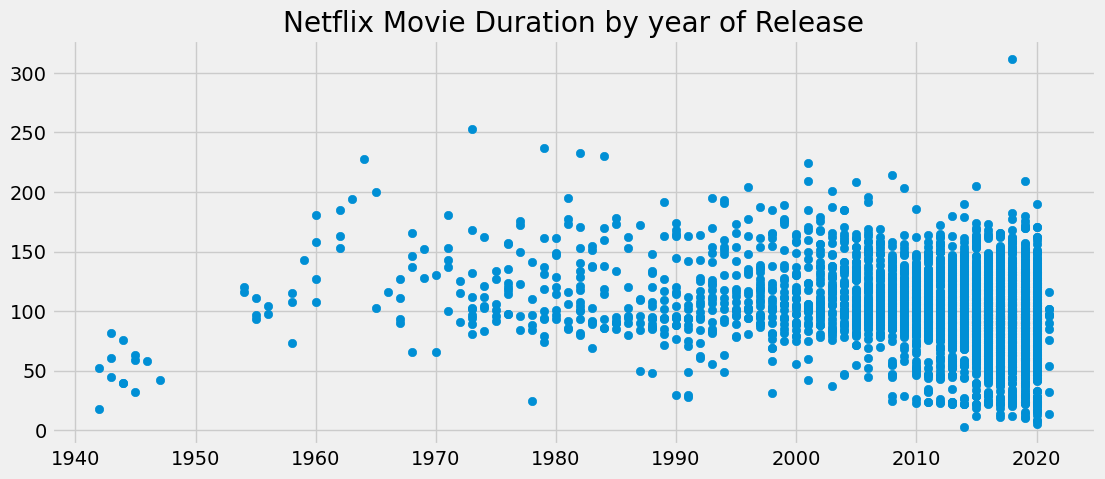

In [49]:
fig=plt.figure(figsize=(12,5))

plt.scatter(netflix_movies['release_year'],netflix_movies['duration'])

plt.title("Netflix Movie Duration by year of Release")

plt.show()

In [50]:
# Filtering shorter movies which are less than 60 minutes
short_movies=netflix_movies[netflix_movies['duration']<60]
short_movies.head(10)

,title,genre,country,release_year,duration
35,#Rucker50,Documentaries,United States,2016,56
55,100 Things to do Before High School,Uncategorized,United States,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,Uncategorized,NaN,2017,37
101,3 Seconds Divorce,Documentaries,Canada,2018,53
146,A 3 Minute Hug,Documentaries,Mexico,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,Uncategorized,France,2016,22
171,A Family Reunion Christmas,Uncategorized,United States,2019,29
177,A Go! Go! Cory Carson Christmas,Children,United States,2020,22
178,A Go! Go! Cory Carson Halloween,Children,NaN,2020,22
179,A Go! Go! Cory Carson Summer Camp,Children,NaN,2020,21


In [51]:
short_movies.genre.unique()

array(['Documentaries', 'Uncategorized', 'Children', 'Stand-Up',
       'Comedies', 'Dramas', 'International Movies', 'Action', 'Music',
       'Classic Movies', 'Anime Features', 'Horror Movies'], dtype=object)

#### Most films which are under 60 min duration are Documentaries, Children's, etc which can be represented with different colors

In [52]:
# Defining empty list to append colors
colors=[]

for lab,row in netflix_movies.iterrows():
    if row['genre']=='Children':
        colors.append('red')
    elif row['genre']=='Documentaries':
        colors.append('blue')
    elif row['genre']=='Stand-Up':
        colors.append('green')
    else:
        colors.append('black')
        
colors[:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'blue']

### Plotting with Color

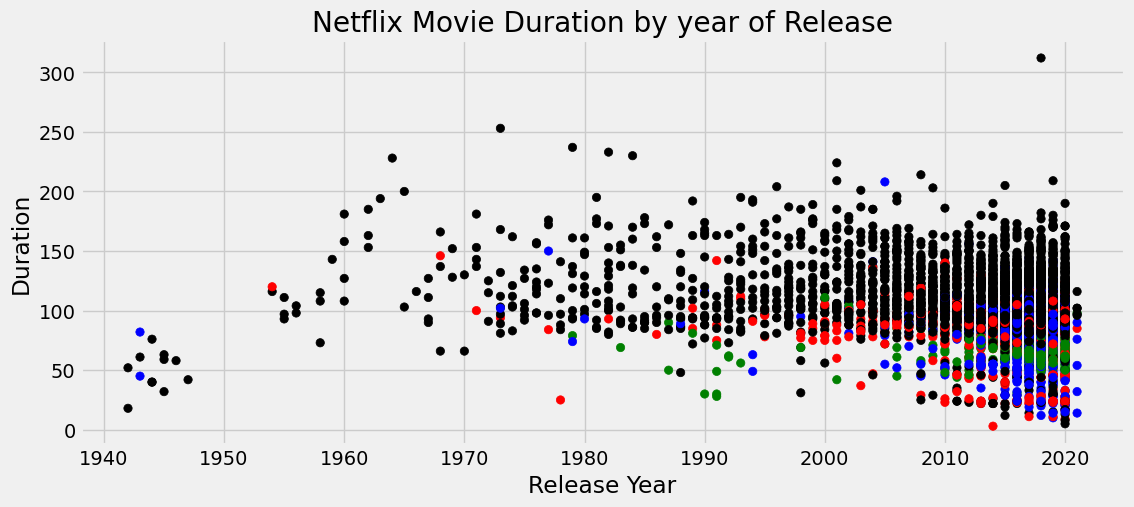

In [53]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(12,5))

plt.scatter(netflix_movies['release_year'],netflix_movies['duration'],c=colors)

plt.title("Netflix Movie Duration by year of Release")
plt.xlabel('Release Year')
plt.ylabel('Duration')

plt.show()

In [57]:
# Removing the above genres
drop_genre=['Documentaries', 'Children', 'Stand-Up', 'Anime Features']

In [58]:
final_df=netflix_movies[~netflix_movies['genre'].isin(drop_genre)]
final_df

,title,genre,country,release_year,duration
14,3022,Independent Movies,United States,2019,91
19,'89,Sports Movies,United Kingdom,2017,87
82,2036 Origin Unknown,Sci-Fi,United Kingdom,2018,95
190,A Kind of Murder,Thrillers,United States,2016,96
431,Along Came a Spider,Thrillers,United States,2001,103
...,...,...,...,...,...
7287,Two Graves,Thrillers,United Kingdom,2018,80
7504,We Belong Together,Thrillers,United States,2018,83
7557,What Keeps You Alive,LGBTQ Movies,Canada,2018,99
7594,White Chamber,Sci-Fi,United Kingdom,2018,89


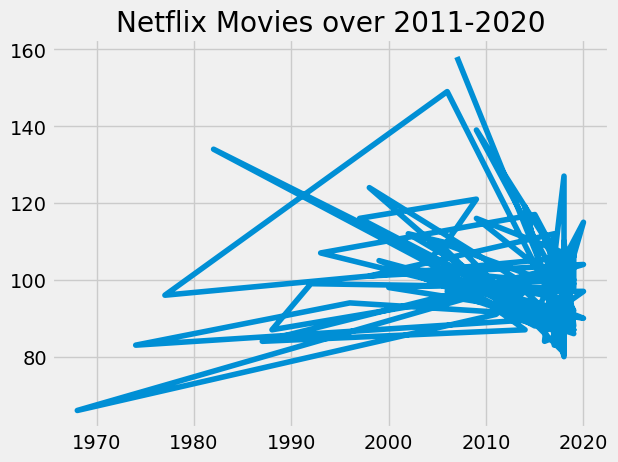

In [62]:
fig=plt.figure()

plt.plot(final_df['release_year'],final_df['duration'])

plt.title("Netflix Movies over 2011-2020")

plt.show()

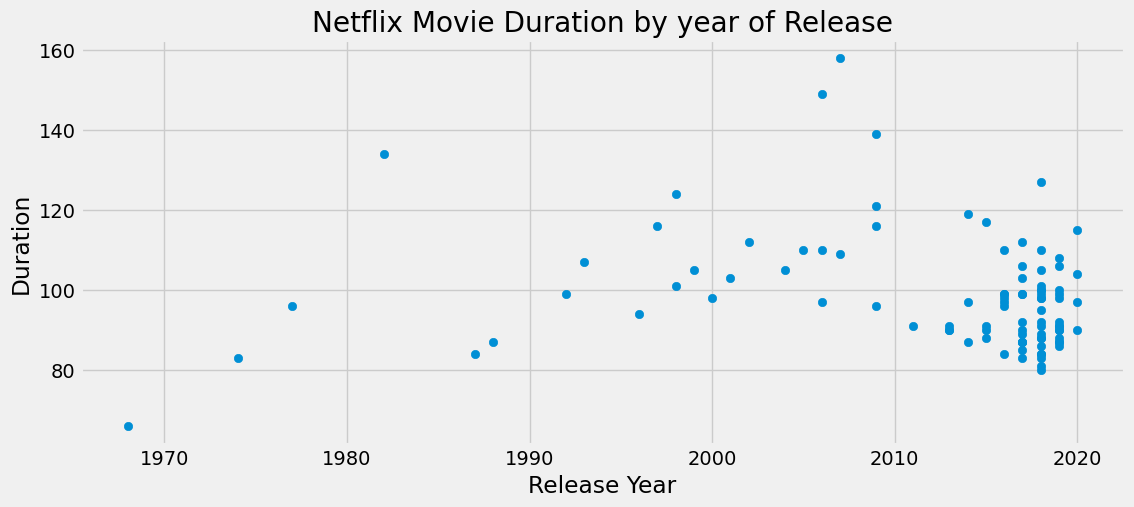

In [61]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(12,5))

plt.scatter(final_df['release_year'],final_df['duration'])

plt.title("Netflix Movie Duration by year of Release")
plt.xlabel('Release Year')
plt.ylabel('Duration')

plt.show()

## Guest Stars in The Office

In [64]:
office_episodes=pd.read_csv('C:/Users/Durga P T M/AA_MachineLearning_Interview/EDA/Dataset/NetflixMovie/the_office_series.csv')
office_episodes.head()

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


In [68]:
office_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    188 non-null    int64  
 1   Season        188 non-null    int64  
 2   EpisodeTitle  188 non-null    object 
 3   About         188 non-null    object 
 4   Ratings       188 non-null    float64
 5   Votes         188 non-null    int64  
 6   Viewership    188 non-null    float64
 7   Duration      188 non-null    int64  
 8   Date          188 non-null    object 
 9   GuestStars    29 non-null     object 
 10  Director      188 non-null    object 
 11  Writers       188 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 17.8+ KB


In [69]:
office_episodes=office_episodes.rename(columns={'Unnamed: 0':'episode_number'})
office_episodes=office_episodes.rename(columns=str.lower)

# Change the type of date column to Date
office_episodes['date']=pd.to_datetime(office_episodes['date'])

# Change the type of season column to categorical
office_episodes['season']=office_episodes['season'].astype('category')

In [70]:
office_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   episode_number  188 non-null    int64         
 1   season          188 non-null    category      
 2   episodetitle    188 non-null    object        
 3   about           188 non-null    object        
 4   ratings         188 non-null    float64       
 5   votes           188 non-null    int64         
 6   viewership      188 non-null    float64       
 7   duration        188 non-null    int64         
 8   date            188 non-null    datetime64[ns]
 9   gueststars      29 non-null     object        
 10  director        188 non-null    object        
 11  writers         188 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 16.8+ KB


array([[<AxesSubplot:title={'center':'episode_number'}>,
        <AxesSubplot:title={'center':'ratings'}>],
       [<AxesSubplot:title={'center':'votes'}>,
        <AxesSubplot:title={'center':'viewership'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'date'}>]], dtype=object)

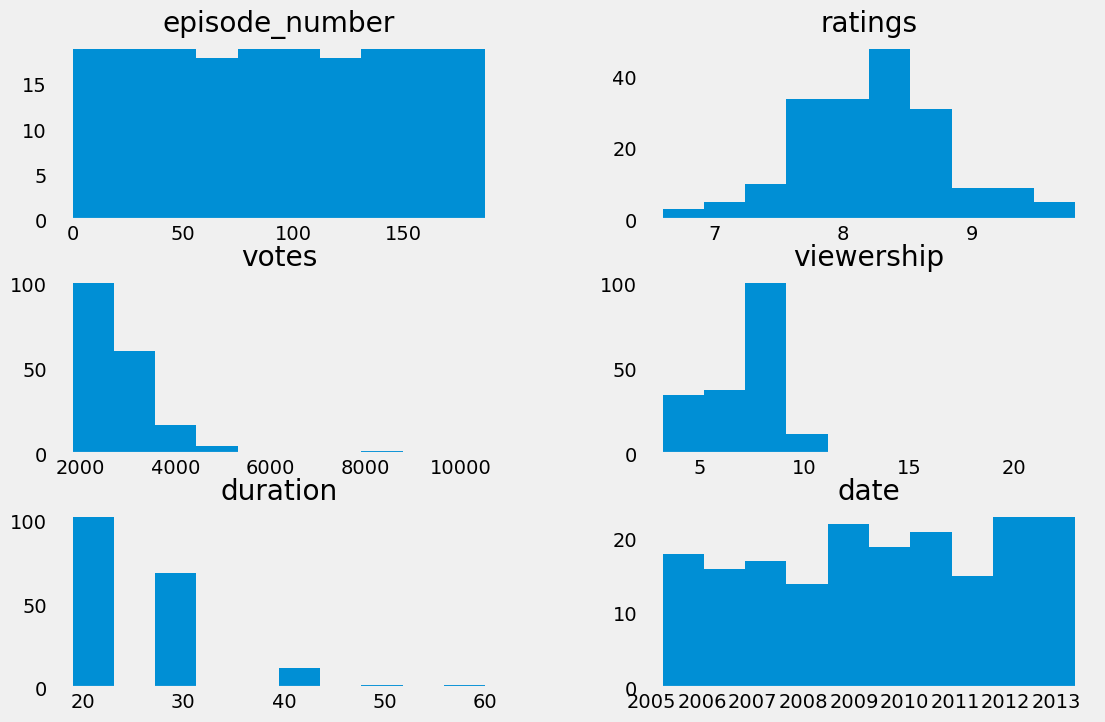

In [74]:
office_episodes.hist(grid=False,figsize=(12,8))

In [78]:
office_episodes['scaled_ratings']=office_episodes['ratings'].apply(lambda x:(x-min(office_episodes['ratings']))/(max(office_episodes['ratings'])-min(office_episodes['ratings'])))
office_episodes.head()

,episode_number,season,episodetitle,about,ratings,votes,viewership,duration,date,gueststars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


In [75]:
office_episodes['has_guests']=[False if guest else True for guest in office_episodes['gueststars'].isna()]
office_episodes.head()

,episode_number,season,episodetitle,about,ratings,votes,viewership,duration,date,gueststars,director,writers,has_guests
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False


### Viewership vs Rating and Guest Appearance

In [85]:
col=[]
for rating in office_episodes['scaled_ratings']:
    if rating < 0.25:
        col.append('red')
    elif rating < 0.5:
        col.append('orange')
    elif rating < 0.75:
        col.append('lightgreen')
    else:
        col.append('lightblue')
        
size=[250 if guest else 25 for guest in office_episodes['has_guests']]

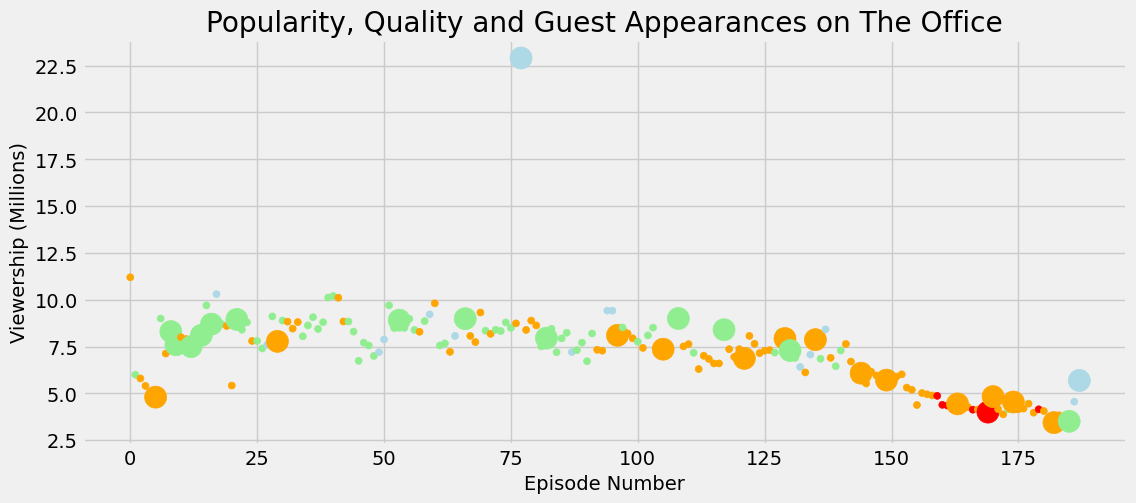

In [86]:
fig=plt.figure(figsize=(12,5))
plt.scatter(x=office_episodes['episode_number'],y=office_episodes['viewership'],color=col,s=size)
plt.title('Popularity, Quality and Guest Appearances on The Office')
plt.xlabel('Episode Number',size=14)
plt.ylabel('Viewership (Millions)',size=14)
plt.show()

Text(0.5, 1.0, 'Number of Episodes per Season')

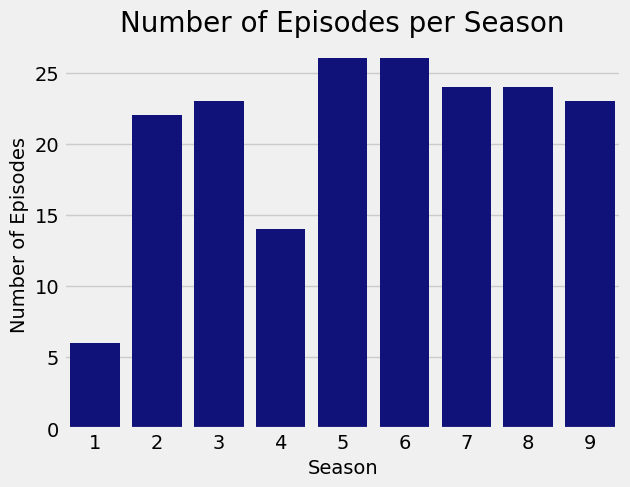

In [84]:
sns.countplot(x='season',data=office_episodes,color='darkblue',)
plt.xlabel('Season',size=14)
plt.ylabel('Number of Episodes',size=14)
plt.title('Number of Episodes per Season',fontsize=20)

### Top 10 episodes with Highest Ratings

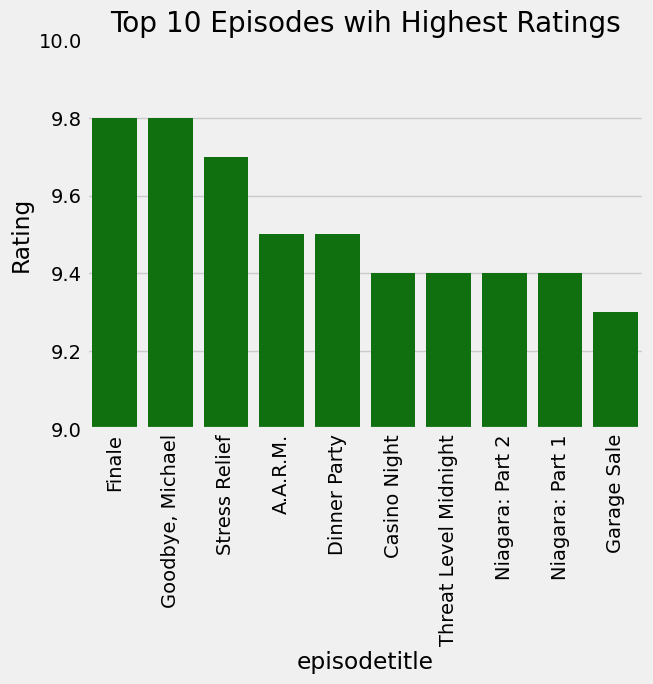

In [89]:
highest_rating=office_episodes.sort_values(by='ratings',ascending=False)[['episodetitle','ratings']].iloc[:10,]

sns.barplot(x='episodetitle',y='ratings',data=highest_rating,color='green')
plt.title('Top 10 Episodes wih Highest Ratings')
plt.ylabel('Rating')
plt.ylim(9,10)
plt.xticks(rotation='vertical');

### Average Viewership per Season

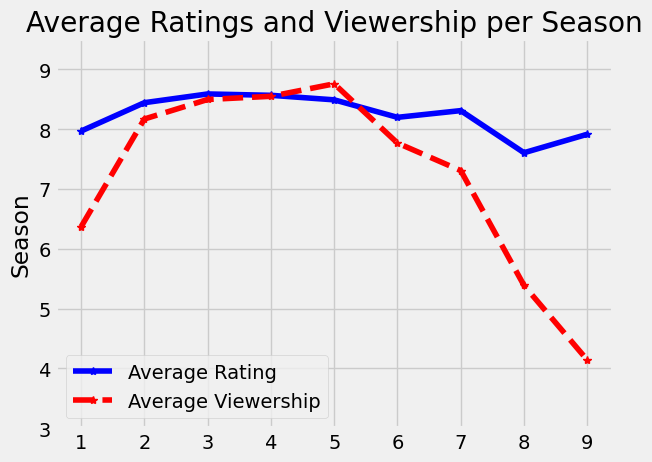

In [91]:
rat_viewer=office_episodes.groupby('season')[['ratings','viewership']].mean()

plt.plot(rat_viewer.index,rat_viewer.ratings,'b*-',label='Average Rating')
plt.plot(rat_viewer.index,rat_viewer.viewership,'r*--',label='Average Viewership')
plt.legend(loc=3)
plt.title('Average Ratings and Viewership per Season')
plt.ylabel('Season')
plt.ylim(3,9.5);

### Viewership in relation to Guests

<AxesSubplot:xlabel='has_guests', ylabel='viewership'>

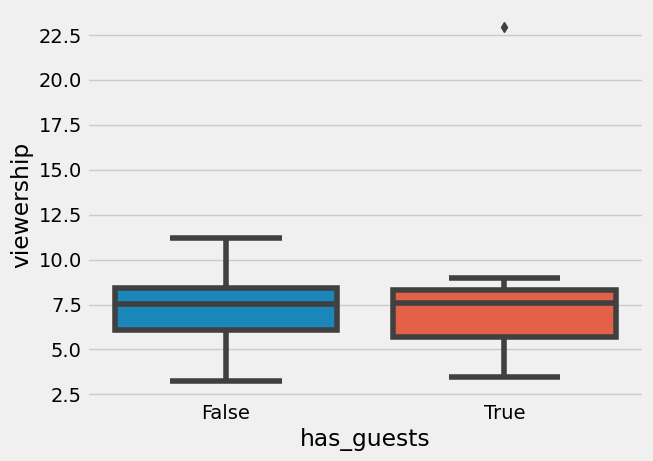

In [93]:
sns.boxplot(y='viewership',x='has_guests',data=office_episodes)